<a href="https://colab.research.google.com/github/rockfirehan/MaskDetection/blob/main/yolo4_FaceMaskDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!git clone https://github.com/AlexeyAB/darknet.git 

Cloning into 'darknet'...
remote: Enumerating objects: 15308, done.
remote: Total 15308 (delta 0), reused 0 (delta 0), pack-reused 15308
Receiving objects: 100% (15308/15308), 13.69 MiB | 30.02 MiB/s, done.
Resolving deltas: 100% (10406/10406), done.


In [3]:
 %cd drive/MyDrive/
 %cd darknet

/content/drive/MyDrive
/content/drive/MyDrive/darknet


In [8]:
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

print("Building. . . It might take 2-3 minutes")
#!make clean
!make &> build_log.txt

Building. . . It might take 2-3 minutes


In [9]:
#!./darknet detector train yolo4-obj.data yolo4-obj-train.cfg yolov4.conv.137 -dont_show 2> train_log.txt
#!./darknet detector train yolo4-obj.data yolo4-obj-train.cfg backup/yolo4-obj_last.weights -dont_show 2> train_log.txt

yolo4-obj-train
net.optimized_memory = 0 
mini_batch = 2, batch = 64, time_steps = 1, train = 1 
Create CUDA-stream - 0 
 Create cudnn-handle 0 
nms_kind: greedynms (1), beta = 0.600000 
nms_kind: greedynms (1), beta = 0.600000 
nms_kind: greedynms (1), beta = 0.600000 


In [10]:
!./darknet detector map yolo4-obj.data yolo4-obj-test.cfg backup/yolo4-obj_final.weights

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv     64       1 x 1/ 1    208 x

In [14]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

def display_output(imagePath):
    src = cv2.imread(imagePath,1)
    output = cv2.imread("predictions.jpg")

    plt.figure(figsize=[20,8])
    plt.subplot(121)
    plt.imshow(src[:,:,::-1])
    plt.title("Original Image")
    plt.subplot(122)
    plt.imshow(output[:,:,::-1])
    plt.title("Predictions")
    plt.show()

net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
Create CUDA-stream - 0 
 Create cudnn-handle 0 
nms_kind: greedynms (1), beta = 0.600000 
nms_kind: greedynms (1), beta = 0.600000 
nms_kind: greedynms (1), beta = 0.600000 

 seen 64, trained: 384 K-images (6 Kilo-batches_64) 
 Detection layer: 139 - type = 28 
 Detection layer: 150 - type = 28 
 Detection layer: 161 - type = 28 
test-image1.jpg: Predicted in 100.392000 milli-seconds.
Mask: 100%


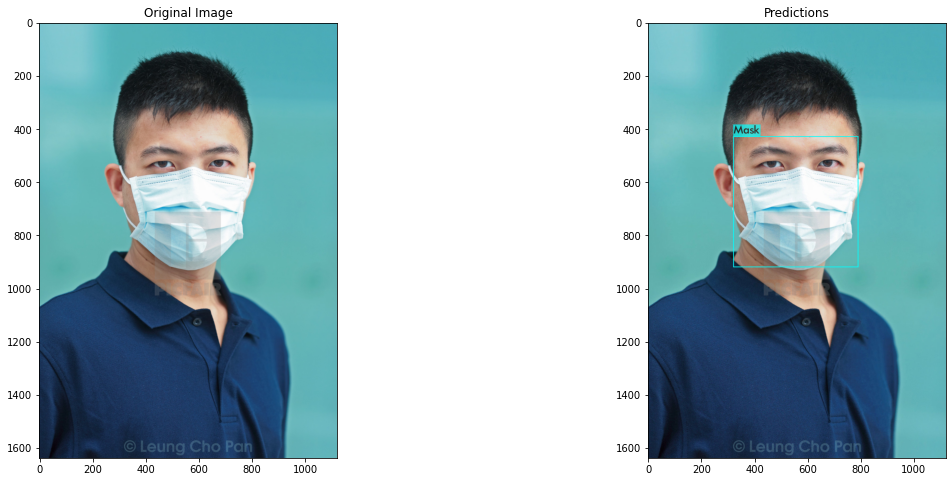

In [17]:
!./darknet detector test yolo4-obj.data yolo4-obj-test.cfg backup/yolo4-obj_final.weights test-image1.jpg -thresh 0.6 -dont_show 2> /dev/null
display_output("test-image1.jpg")

net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
Create CUDA-stream - 0 
 Create cudnn-handle 0 
nms_kind: greedynms (1), beta = 0.600000 
nms_kind: greedynms (1), beta = 0.600000 
nms_kind: greedynms (1), beta = 0.600000 

 seen 64, trained: 384 K-images (6 Kilo-batches_64) 
 Detection layer: 139 - type = 28 
 Detection layer: 150 - type = 28 
 Detection layer: 161 - type = 28 
test-image2.jpg: Predicted in 100.225000 milli-seconds.
Mask: 100%
Mask: 100%
Mask: 93%
No-mask: 100%
Mask: 98%


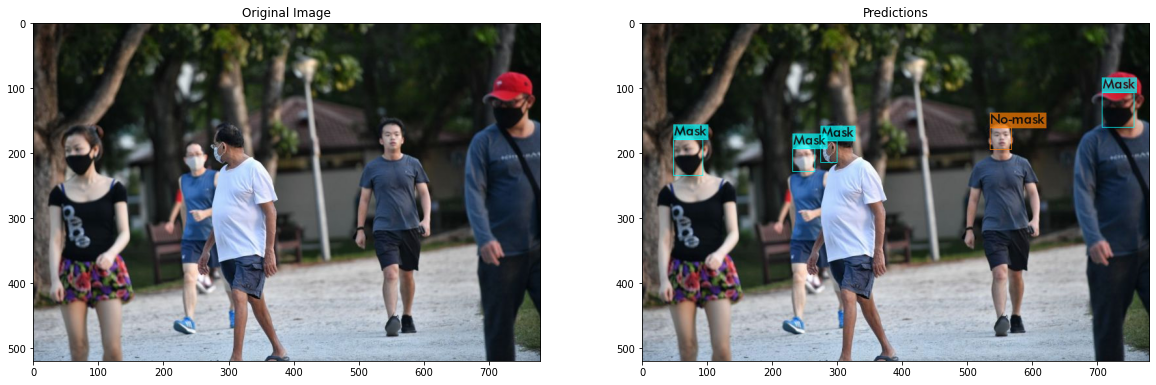

In [18]:
!./darknet detector test yolo4-obj.data yolo4-obj-test.cfg backup/yolo4-obj_final.weights test-image2.jpg -thresh 0.6 -dont_show 2> /dev/null
display_output("test-image2.jpg")

net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
Create CUDA-stream - 0 
 Create cudnn-handle 0 
nms_kind: greedynms (1), beta = 0.600000 
nms_kind: greedynms (1), beta = 0.600000 
nms_kind: greedynms (1), beta = 0.600000 

 seen 64, trained: 384 K-images (6 Kilo-batches_64) 
 Detection layer: 139 - type = 28 
 Detection layer: 150 - type = 28 
 Detection layer: 161 - type = 28 
test-image3.jpg: Predicted in 86.553000 milli-seconds.
Mask: 100%
Mask: 76%
Mask: 100%
No-mask: 100%
Mask: 100%
Mask: 100%
Mask: 100%
Mask: 100%
Mask: 100%
Mask: 100%
Mask: 100%
Mask: 100%
Mask: 100%
Mask: 100%
Mask: 100%
Mask: 100%
Mask: 99%
Mask: 100%
Mask: 100%


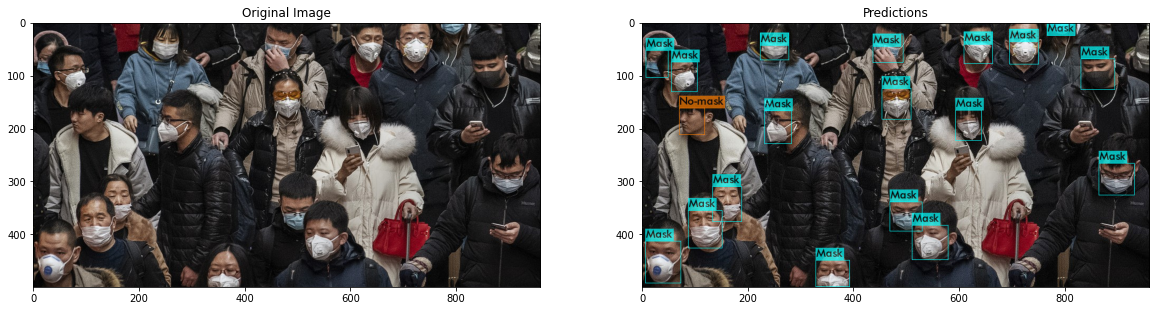

In [19]:
!./darknet detector test yolo4-obj.data yolo4-obj-test.cfg backup/yolo4-obj_final.weights test-image3.jpg -thresh 0.6 -dont_show 2> /dev/null
display_output("test-image3.jpg")

net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
Create CUDA-stream - 0 
 Create cudnn-handle 0 
nms_kind: greedynms (1), beta = 0.600000 
nms_kind: greedynms (1), beta = 0.600000 
nms_kind: greedynms (1), beta = 0.600000 

 seen 64, trained: 384 K-images (6 Kilo-batches_64) 
 Detection layer: 139 - type = 28 
 Detection layer: 150 - type = 28 
 Detection layer: 161 - type = 28 
test-image4.jpg: Predicted in 100.200000 milli-seconds.
No-mask: 97%
No-mask: 95%
Mask: 100%
Mask: 76%
Mask: 100%
No-mask: 98%
Mask: 100%
No-mask: 96%
Mask: 100%


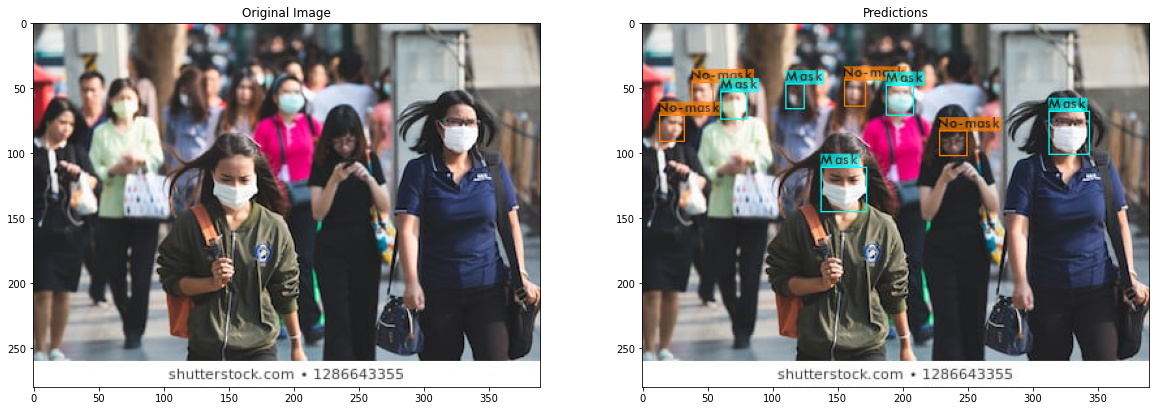

In [20]:
!./darknet detector test yolo4-obj.data yolo4-obj-test.cfg backup/yolo4-obj_final.weights test-image4.jpg -thresh .6 -dont_show 2> /dev/null
display_output("test-image4.jpg")